# Tarefa 2: Aprendizado Não-Supervisionado

**Autor**: Matheus Jericó Palhares <br>
**LinkedIn**: https://linkedin.com/in/matheusjerico <br>
**Github**: https://github.com/matheusjerico

### 1) Implementar a função “fit_pam(pontos, alpha)”, com K fixo e igual a 3. Retorne os centroids finais.

**Variáveis**:
- pontos: conjunto de pontos 2D (casos x mortes) que serão clusterizados
- alpha: valor de α que indica a quantidade de tentativas sem melhoria de custo total médio que devem ser realizadas antes da interrupção do algoritmo



O relatório será o notebook exportado para um arquivo HTML e deve conter:
- Um scatter plot mostrando os medoids (com marcador x) e seus respectivos pontos (cada cluster deve estar em uma cor distinta)
- Para cada cluster, também devem ser exibidos seus custos totais, bem como o custo total médio
- Discorra sobre cada cluster: o que eles indicam?



#### 1. Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from copy import deepcopy

#### 2. Carregando dados

In [2]:
dataset = pd.read_csv("./Dataset/base-covid-19-us.csv")
dataset.head()

,county,cases,deaths
0,Abbeville,84,0
1,Acadia,741,21
2,Accomack,116,0
3,Ada,4264,41
4,Adair,325,8


In [3]:
dataset.shape

(1570, 3)

In [4]:
dataset.sort_values(by=['deaths'], inplace=True)

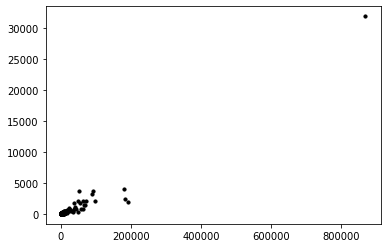

In [5]:
cases = dataset['cases'].values
deaths = dataset['deaths'].values
X = np.array(list(zip(cases, deaths)))
plt.scatter(cases, deaths, c='black', s=10)

#### 3. Criando classe do Pam

In [6]:
class Pam:
    def __init__(self, k, pontos, alpha = 100):
        self.k = k
        self.alpha = alpha
        self.data = pontos
        
    # Calculando custo
    def custo(self, a, b):
      retorno = (a[0] - b[0])**2 + (a[1] - b[1])**2
      return retorno
    
    def fit(self):
        self.medoids = []
        self.mse = -1
        self.custos_totais = []

        medoids_tmp = []
        indices_para_escolher = list(range(len(self.data)))
        indices = np.random.randint(0, len(self.data), size=self.k)
        tentativas = 0

        for indice in indices:
            indices_para_escolher.remove(indice)
            self.medoids.append(self.data[indice])
        
        # armazenando o valor dos medoids quando ele for atualizado
        indices_tmp = []
        
        # label dos clusters 
        self.clusters = np.zeros(len(self.data))

        custos_totais_tmp = [0] * self.k
        
        # Loop de treinamento
        for i in range(len(self.data) - self.k):
            # atribuindo cada valor ao cluster mais próximo
            for j in range(len(self.data)):
                if j in indices:
                    continue

                custos = []
                for medoid in self.medoids:
                    custos.append(self.custo(self.data[j], medoid))
                cluster = np.argmin(custos)
                self.clusters[j] = cluster
                custos_totais_tmp[cluster] += min(custos)

            # calculando o custo total medio
            mse_tmp = 0
            unique, counts = np.unique(self.clusters, return_counts=True)
            for j in range(self.k):
                if counts[j] > 0:
                    custos_totais_tmp[j] += custos_totais_tmp[j]/counts[j]

            mse_tmp = np.mean(custos_totais_tmp)

            if (self.mse == -1) | (self.mse > mse_tmp):
                self.mse = mse_tmp
                self.custos_totais = deepcopy(custos_totais_tmp)
                # guardando valores dos indices dos medoids antigos
                indices_tmp = deepcopy(indices)
                tentativas = 0
            else:
                tentativas += 1

            if tentativas >= self.alpha:
                break

            # encontrando novo medoid
            posicao = np.random.randint(0, len(indices_para_escolher)) 
            indice = indices_para_escolher[posicao]
            indices_para_escolher.remove(indice)
            custos = []
            for medoid in self.medoids:
                custos.append(self.custo(self.data[indice], medoid))
            new_medoid_index = np.argmin(custos)
            indices[new_medoid_index] = indice
            self.medoids[new_medoid_index] = self.data[indice]

    def plot(self):
        colors = int(self.k/6 + 1)*['r', 'g', 'b', 'y', 'c', 'm']
        fig, ax = plt.subplots()

        for i in range(self.k):
            points = np.array([self.data[j] for j in range(len(self.data)) if self.clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
            for medoid in self.medoids:
                ax.scatter(medoid[0], medoid[1], marker='X', s=100, c='black')

#### 4. Inicializando a classe com os parametros desejados do exercício e realizando o treinamento

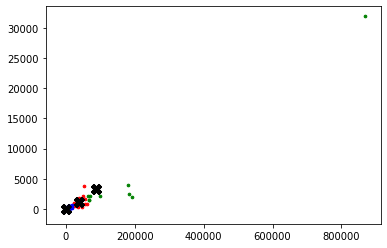

In [7]:
pam = Pam(k = 3, pontos = X, alpha = 100)
pam.fit()
pam.plot()

In [8]:
pam.medoids

[array([39302,  1106]), array([87378,  3236]), array([70,  0])]

In [9]:
dataset['cluster'] = pam.clusters

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1570 entries, 0 to 995
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   county   1570 non-null   object 
 1   cases    1570 non-null   int64  
 2   deaths   1570 non-null   int64  
 3   cluster  1570 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 61.3+ KB


In [11]:
dataset.head()

,county,cases,deaths,cluster
0,Abbeville,84,0,2.0
865,Manitowoc,17,0,2.0
866,Marathon,108,0,2.0
869,Maries,20,0,2.0
871,Marinette,27,0,2.0


#### 5. Visualizando graficamente

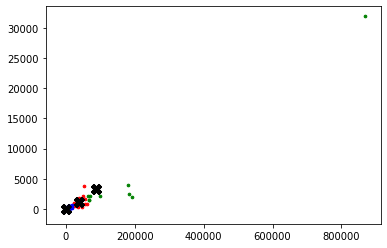

In [12]:
pam.plot()

In [13]:
pam.medoids

[array([39302,  1106]), array([87378,  3236]), array([70,  0])]

**Resposta**: <br>
Os clusters representam os estados com base na quantidade de casos e mortes do COVID-19.
- O primeiro cluster (verde), representa os estados que tiveram baixa quantidade de casos e mortes devido ao COVID-19
- O segundo cluster(azul), representa os estados que tiveram quantidade moderada/alta de casos e mortes devido ao COVID-19.
- O terceiro cluster (vermelho), representa o estado de New York (possuem uma quantidade muito elevada de casos de COVID-19


#### 6. Para cada cluster, também devem ser exibidas as distâncias médias entre os pontos e seu respectivo centróide final

In [14]:
def print_custos(pam):
    for i in range(pam.k):  
        print("Custo Total entre os pontos do medoid {}: {}".format(i, pam.custos_totais[i]))

    print("Custo Total Médio: {}".format(pam.mse))

In [15]:
print_custos(pam)

Custo Total entre os pontos do medoid 0: 3240794.6790697672
Custo Total entre os pontos do medoid 1: 938980649735.3953
Custo Total entre os pontos do medoid 2: 15978515.073991032
Custo Total Médio: 312999956348.38275


### **Obs**: Retirando o estado de New York, a visualização do cluster fica muito melhor.

#### 7. Retirando o estado de New York
- Retirar o estado de New York, utilizar o algoritmo Kmeans e visualizar os cluster.

In [16]:
dataset=dataset.iloc[:-1,:]

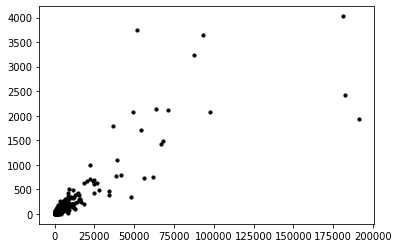

In [17]:
cases = dataset['cases'].values
deaths = dataset['deaths'].values
X = np.array(list(zip(cases, deaths)))
plt.scatter(cases, deaths, c='black', s=10)

In [18]:
pam = Pam(k = 3, pontos = X, alpha = 100)
pam.fit()

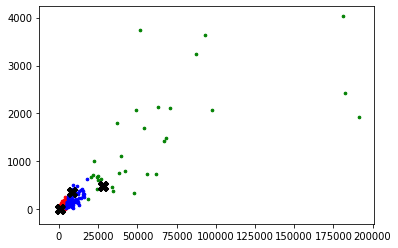

In [19]:
pam.plot()

In [20]:
pam.medoids

[array([352,   9]), array([27995,   479]), array([8600,  371])]

In [21]:
dataset['cluster'] = pam.clusters

In [22]:
print_custos(pam)

Custo Total entre os pontos do medoid 0: 811789.5645161291
Custo Total entre os pontos do medoid 1: 184454710791.77243
Custo Total entre os pontos do medoid 2: 1089847.656140351
Custo Total Médio: 61485537476.331024


# Desafios

#### Plotar o gráfico que permite visualizar o elbow point, variando o valor de K e indicar qual o melhor valor

In [23]:
def elbow_plot(data, k_max):
    dataset = data.copy()
    custos = []

    cases = dataset['cases'].values
    deaths = dataset['deaths'].values
    X = np.array(list(zip(cases, deaths)))

    for i in range(k_max - 2):
        pam = Pam(k = i+2, pontos = X)
        pam.fit()

        dataset['cluster'] = pam.clusters
        
        custos.append([i+2, pam.mse])

    x = []
    y = []

    fig, ax = plt.subplots()
    for i in range(len(custos)):
        x.append(custos[i][0])
        y.append(custos[i][1])

    ax.set_xlabel('Quantidade de Clusters')
    ax.set_ylabel('Distância Média')

    ax.plot(x, y, c='b', marker='x')

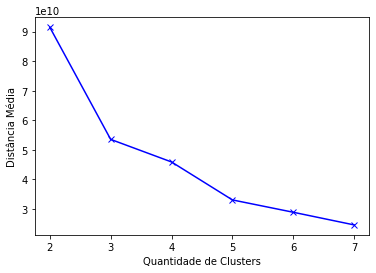

In [25]:
elbow_plot(dataset, 8)